# Module 1 - Data Load / Display / Normalization

In this module you will learn how to load a nifti image utilizing  nibabel and create datasets that can be used with machine learning algorithms. The basic features we will consider are intensity based and originate from multiple acquisition types. 

### Step 1: Load basic python libraries 

In [26]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import csv
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
import nibabel as nib

### Step 2: Load the three types of images available. 

- T1w pre-contrast
- FLAIR 
- T1w post-contrast 

The goal is to  create a 4D image that contains all four 3D volumes we will use in our example

In [27]:
CurrentDir= os.getcwd()

# Print current directory
print (CurrentDir)

# Get parent direcotry 
print(os.path.abspath(os.path.join(CurrentDir, os.pardir)))

# Create the file paths. The images are contained in a subfolder called Data. 
PostName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data",  'POST.nii.gz')  )
PreName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'PRE.nii.gz') )
FLAIRName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'FLAIR.nii.gz') )
GroundTruth=  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'GroundTruth.nii.gz') )


# read Pre in--we assume that all images are same x,y dims
Pre = nib.load(PreName)
# Pre is a class containing the image data among other information 
Pre=Pre.get_data()

xdim = np.shape(Pre)[0]
ydim = np.shape(Pre)[1]
zdim = np.shape(Pre)[2]
# Printing the dimensions of an image 
print ('Dimensions')
print (xdim,ydim,zdim)
# make space in a numpy array for the images
ArrayDicom = np.zeros((xdim, ydim,zdim, 4), dtype=Pre.dtype)
# copy Pre pixels into z=0
ArrayDicom[:, :, :, 0] = Pre
# Post
Post = nib.load(PostName)
# Pre is a class containing the image data among other information 
Post=Post.get_data()

ArrayDicom[:, :, :, 1] = Post
#FLAIR
Flair = nib.load(FLAIRName)
# Pre is a class containing the image data among other information 
Flair=Flair.get_data()

ArrayDicom[:, :, :, 2] = Flair  
print ("Data Loaded")

/home/pan0s/Dropbox/MachineLearningForMedicalImages/notebooks
/home/pan0s/Dropbox/MachineLearningForMedicalImages
Dimensions
240 240 155
Data Loaded


### Create traing set

We assume the following labels. 

> Enhancing Tumor = 4

> Edema = 2

> WM and CSF and GM=1

> Background (air) = 0
    

In [28]:
#  Load Ground Truth
GroundTrutha = nib.load(GroundTruth)
GroundTruth=GroundTrutha.get_data()
print ("Data Loaded")

Data Loaded


#### Plot the images 

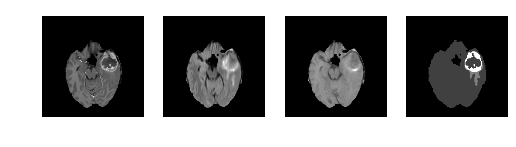

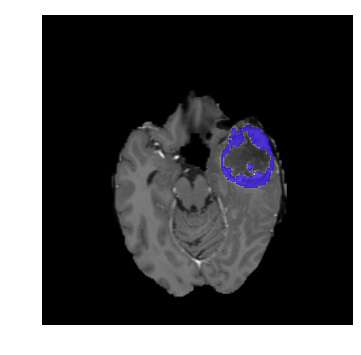

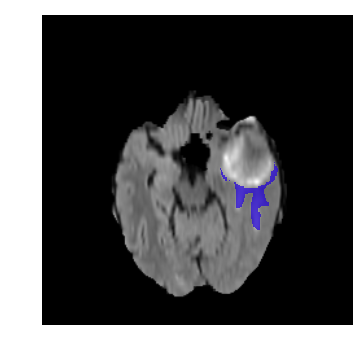

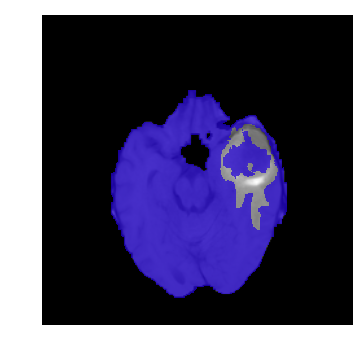

In [29]:
def display_overlay(Image1, Image2):
    """
    Function: Overlays Image2 over Image1
    Image 1: 2D image
    Image 2: 2D Image

    Requires numpy, matplotlib
    """
    Image1=np.rot90(Image1,3)
    Image2=np.rot90(Image2,3)
    Image2 = np.ma.masked_where(Image2 == 0, Image2)
    plt.imshow(Image1, cmap=plt.cm.gray)
    plt.imshow(Image2, cmap=plt.cm.brg, alpha=.7, vmin=.7, vmax=5, interpolation='nearest')
    plt.axis('off')
    plt.show()

f, (ax1,ax2,ax3,ax4)=plt.subplots(1,4)
ax1.imshow(np.rot90(Post[:, :, 55,],3), cmap=plt.cm.gray)
ax1.axis('off')
ax2.imshow(np.rot90(Flair[:, :, 55,],3), cmap=plt.cm.gray)
ax2.axis('off')
ax3.imshow(np.rot90(Pre[:, :, 55,],3), cmap=plt.cm.gray)
ax3.axis('off')
ax4.imshow(np.rot90(GroundTruth[:, :, 55,],3), cmap=plt.cm.gray)
ax4.axis('off')

plt.show()

display_overlay(Post[:, :, 55,], GroundTruth[:,:,55]==4)  
display_overlay(Flair[:, :, 55,], GroundTruth[:,:,55]==2)  
display_overlay(Pre[:, :, 55,], GroundTruth[:,:,55]==1)    

### Create dataset

In [30]:
# Create classes
# Tissue =GM+CSG+WM
ClassTissuePost=(Post[np.nonzero(GroundTruth==1)])
ClassTissuePre=(Pre[np.nonzero(GroundTruth==1)])
ClassTissueFlair=(Flair[np.nonzero(GroundTruth==1)])
# Enhancing Tumor 
ClassTumorPost=(Post[np.nonzero(GroundTruth==4)])
ClassTumorPre=(Pre[np.nonzero(GroundTruth==4)])
ClassTumorFlair=(Flair[np.nonzero(GroundTruth==4)])
# Edema 
ClassEdemaPost=(Post[np.nonzero(GroundTruth==2)])
ClassEdemaPre=(Pre[np.nonzero(GroundTruth==2)])
ClassEdemaFlair=(Flair[np.nonzero(GroundTruth==2)])

# We only select 1000 points for demosntration purposes
IND=np.random.randint(np.shape(ClassTumorPre)[0], size=1000)
ClassTissuePost=ClassTissuePost[IND]
ClassTissuePre=ClassTissuePre[IND]
ClassTissueFlair=ClassTissueFlair[IND]
ClassTumorPost=ClassTumorPost[IND]
ClassTumorPre=ClassTumorPre[IND]
ClassTumorFlair=ClassTumorFlair[IND]
ClassEdemaPost=ClassEdemaPost[IND]
ClassEdemaPre=ClassEdemaPre[IND]
ClassEdemaFlair=ClassEdemaFlair[IND]

# Normalize zero mean unit standard deviation

# ClassTissuePost= preprocessing.scale(ClassTissuePost)
# ClassTissuePre= preprocessing.scale(ClassTissuePre)
# ClassTissueFlair= preprocessing.scale(ClassTissueFlair)
# ClassTumorPost= preprocessing.scale(ClassTumorPost)
# ClassTumorPre= preprocessing.scale(ClassTumorPre)
# ClassTumorFlair= preprocessing.scale(ClassTumorFlair)
# ClassEdemaPost= preprocessing.scale(ClassEdemaPost)
# ClassEdemaPre= preprocessing.scale(ClassEdemaPre)
# ClassEdemaFlair= preprocessing.scale(ClassEdemaFlair)


# Save the data to CSV using pandas
print ("Saving the data to a pandas dataframe and subsequently to a csv")
# Create a dictionary containing the classes
datasetcomplete={"ClassTissuePost": ClassTissuePost, "ClassTissuePre": ClassTissuePre, "ClassTissueFlair": ClassTissueFlair, "ClassTumorPost": ClassTumorPost, "ClassTumorPre": ClassTumorPre, "ClassTumorFlair": ClassTumorFlair, "ClassEdemaPost": ClassEdemaPost, "ClassEdemaPre": ClassEdemaPre, "ClassEdemaFlair": ClassEdemaFlair}

datapd=pd.DataFrame.from_dict(datasetcomplete,orient="index")
# print (datapd)
datapd=datapd.transpose()
# datapd=pd.DataFrame(dict([ (k,Series(v)) for k,v in datasetcomplete.iteritems() ]))
datapd.to_csv("DataExample.csv",index=False)




Saving the data to a pandas dataframe and subsequently to a csv


### Create some scatter plots

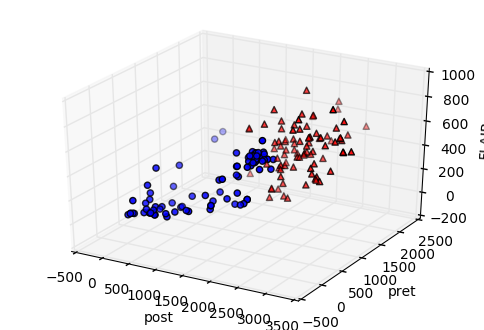

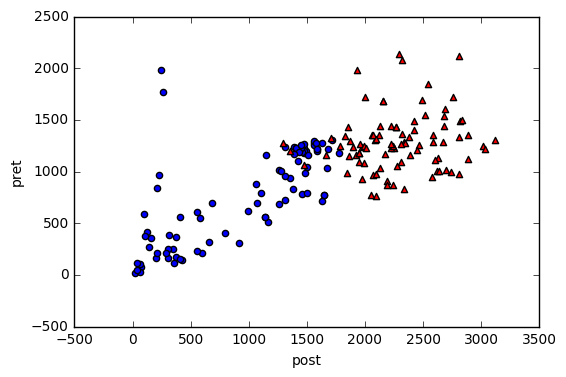

In [31]:
# Display Tumor vs NAWM
IND=np.random.randint(1000, size=90)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ClassTissuePost[IND,], ClassTissuePre[IND,], ClassTissueFlair[IND,])
ax.scatter(ClassTumorPost[IND,], ClassTumorPre[IND,], ClassTumorFlair[IND,], c='r', marker='^')
ax.set_xlabel('post')
ax.set_ylabel('pret')
ax.set_zlabel('FLAIR')
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(ClassTissuePost[IND,], ClassTissuePre[IND,])
ax.scatter(ClassTumorPost[IND,], ClassTumorPre[IND,], c='r', marker='^')
ax.set_xlabel('post')
ax.set_ylabel('pret')
plt.show()

## Describe the data 

In [32]:
# descriptions
print(datapd.describe())

       ClassTissuePost  ClassEdemaPost  ClassTissuePre  ClassEdemaPre  \
count      1000.000000     1000.000000     1000.000000    1000.000000   
mean        992.092325     1492.454135      794.140768    1193.218990   
std         607.124188      184.572003      432.810362      82.252787   
min           0.000000      148.189880        2.820462     870.960571   
25%         312.764748     1365.593994      368.567680    1136.170837   
50%        1240.714600     1514.409241      888.435120    1195.547546   
75%        1494.990295     1609.745331     1199.427643    1249.263184   
max        2287.294434     2407.706299     2112.049316    1590.390137   

       ClassTumorPre  ClassTumorFlair  ClassTissueFlair  ClassTumorPost  \
count    1000.000000      1000.000000       1000.000000     1000.000000   
mean     1233.979050       497.221808        212.047652     2303.880868   
std       240.065824       138.311401        155.878784      462.319454   
min       555.732483       100.145447     